#### Fase 2:  Identificación de atributos en común entre los miembros de las comunidades.
**Grupo 14**
- Edna Julieth Mora Albarracin
- Elvin Rodrigo Mendez Gamba
- Juan Jose Miguel Ovalle Villamil

#### Librerias y Configuracion

In [1]:
import os
from pathlib import Path

from community import community_louvain
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

import sweetviz as sv

DATA_PATH = Path("../data/")

/home/jjmov99/universidad/redes_proyecto/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.listdir(DATA_PATH)

['Arcos.xlsx', 'Nodos.xlsx']

#### Lectura de datos y Carga de la red

In [3]:
# Se cargan los datos de los nodos
nodos = pd.read_excel(DATA_PATH / "Nodos.xlsx")
print(f"Filas: {nodos.shape[0]:,}, Columnas: {nodos.shape[1]}")
nodos.head()

Filas: 2,211, Columnas: 33


Id                       Headquarters Location  \
0         Tencent                  Shenzhen, Guangdong, China   
1  Warburg Pincus           New York, New York, United States   
2         Twitter    San Francisco, California, United States   
3         Ubisoft  Montreuil-sous-bois, Ile-de-France, France   
4          WeWork           New York, New York, United States   

  Operating Status Company Type  Number of Investments  \
0           Active   For Profit                  693.0   
1           Active          NaN                  433.0   
2           Active   For Profit                   10.0   
3           Active   For Profit                    9.0   
4           Active   For Profit                    9.0   

   Number of Lead Investments  Number of Diversity Investments  \
0                       375.0                             15.0   
1                       286.0                             22.0   
2                         2.0                              1.0   
3                         NaN                              NaN   
4                         6.0                              4.0   

   Number of Exits  Number of Lead Investors  Number of Investors  ...  \
0            125.0                       1.0                  4.0  ...   
1            131.0                       NaN                  NaN  ...   
2              3.0                       9.0                 37.0  ...   
3              1.0                       1.0                  4.0  ...   
4              2.0                      11.0                 24.0  ...   

  Total Funding Amount Total Funding Amount Currency  \
0         1.257677e+10                           USD   
1         3.802820e+07                           USD   
2         4.430192e+09                           USD   
3         7.706506e+08                           USD   
4         2.159578e+10                           USD   

   Total Funding Amount Currency (in USD) Number of Events  \
0                            1.257677e+10             22.0   
1                            3.802820e+07              NaN   
2                            4.430192e+09             77.0   
3                            7.706506e+08             16.0   
4                            2.159578e+10            120.0   

  SEMrush - Monthly Visits  SEMrush - Average Visits (6 months)  \
0                4,085,844                            3,553,184   
1                   34.635                            34,033.67   
2            6,026,399,205                     3,104,998,131.33   
3               32,820,567                        27,881,933.83   
4                2,646,155                         2,483,475.83   

  SEMrush - Visit Duration  Aberdeen - IT Spend Aberdeen - IT Spend Currency  \
0                    600.0                  NaN                          NaN   
1                    392.0              53801.0                          USD   
2                    942.0                  NaN                          NaN   
3                    392.0                  NaN                          NaN   
4                    280.0             343977.0                          USD   

  Aberdeen - IT Spend Currency (in USD)  
0                                   NaN  
1                               53801.0  
2                                   NaN  
3                                   NaN  
4                              343977.0  

[5 rows x 33 columns]

In [4]:
# Se cargan los datos de los arcos
arcos = pd.read_excel(DATA_PATH / "Arcos.xlsx")
print(f"Filas: {arcos.shape[0]:,}, Columnas: {arcos.shape[1]}")
arcos.head()

Filas: 4,187, Columnas: 2


Source     Target
0    01 Advisors   Electric
1    01 Advisors     Origin
2  17Capital LLP  NewSpring
3            1kx    Arweave
4            1kx    Rarible

In [5]:
# Se crea la red apartir de los datos de los arcos
G = nx.from_pandas_edgelist(
    df=arcos,
    source="Source",
    target="Target",
    create_using=nx.DiGraph() # Se asegura que la red sea dirigida
)

# Se inspecciona el numero de nodos y arcos
print(f"Nodos: {G.number_of_nodes():,}")
print(f"Arcos: {G.number_of_edges():,}")

Nodos: 2,165
Arcos: 4,187


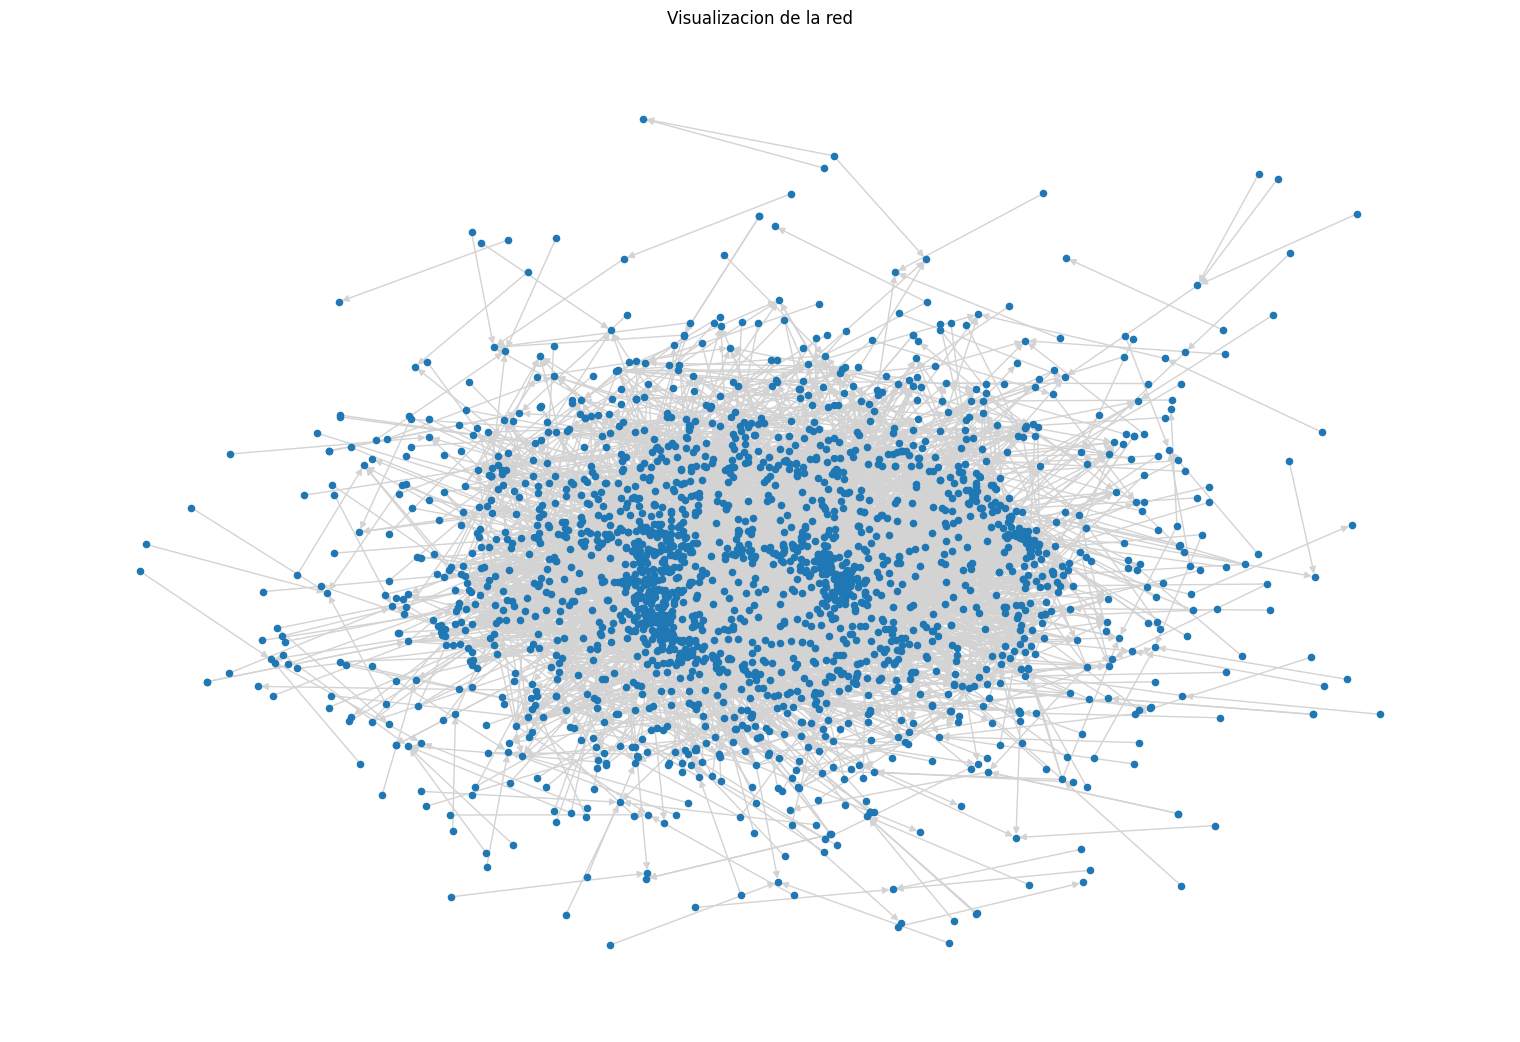

In [6]:
plt.figure(figsize=(15, 10))
nx.draw_kamada_kawai(
    G=G,
    node_size=20,
    edge_color='lightgray'
)
plt.title("Visualizacion de la red")
plt.show()

### 1. Identificacion de Comunidades

#### 1.1 Algoritmo de Louvain
Este algoritmo es particularmente útil en este contexto debido a su capacidad para identificar comunidades de manera eficiente en redes grandes, lo cual es común en redes de organizaciones. La razón principal para elegir el método de Louvain radica en su enfoque en optimizar la modularidad, lo que permite descubrir agrupaciones naturales dentro de la red basadas en la densidad de conexiones. Esto es crucial para una organización que busca financiamiento, ya que permite identificar grupos de organizaciones con intereses o misiones similares, facilitando la identificación de posibles colaboradores o financiadores que comparten objetivos alineados con los de la organización en búsqueda de recursos.


In [7]:
# Se convierte a no dirigida
G_undirected = G.to_undirected()

# Algoritmo de Louvain
partition_louvain = community_louvain.best_partition(graph=G_undirected, random_state=1399)

In [8]:
# Se crea un dataframe con la asignacion de comunidades
comunidades = pd.DataFrame(
    data=partition_louvain.items(),
    columns=["Nodo", "Comunidad"]
)
comunidades.head().T

0         1       2              3          4
Nodo       01 Advisors  Electric  Origin  17Capital LLP  NewSpring
Comunidad            7         7       7              1          1

In [9]:
# Numero de comunidades
print(f"Numero de comunidades: {comunidades['Comunidad'].nunique()}")

Numero de comunidades: 35


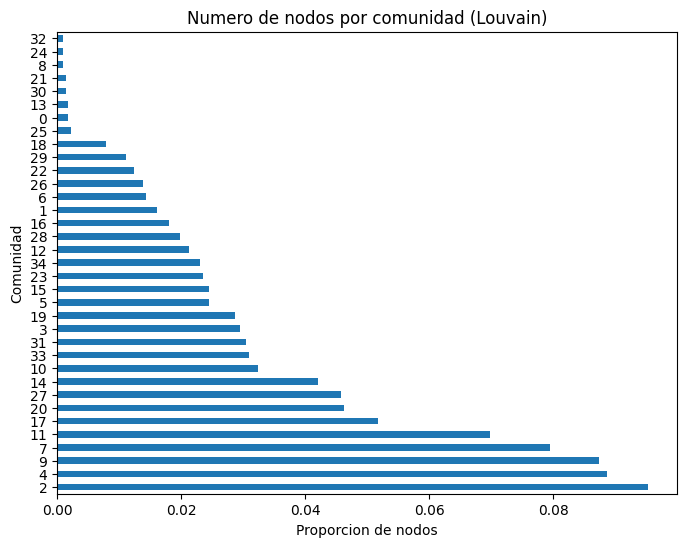

In [10]:
comunidades["Comunidad"].value_counts(True).plot(kind="barh", figsize=(8, 6), title="Numero de nodos por comunidad (Louvain)")
plt.ylabel("Comunidad")
plt.xlabel('Proporcion de nodos')
plt.show()

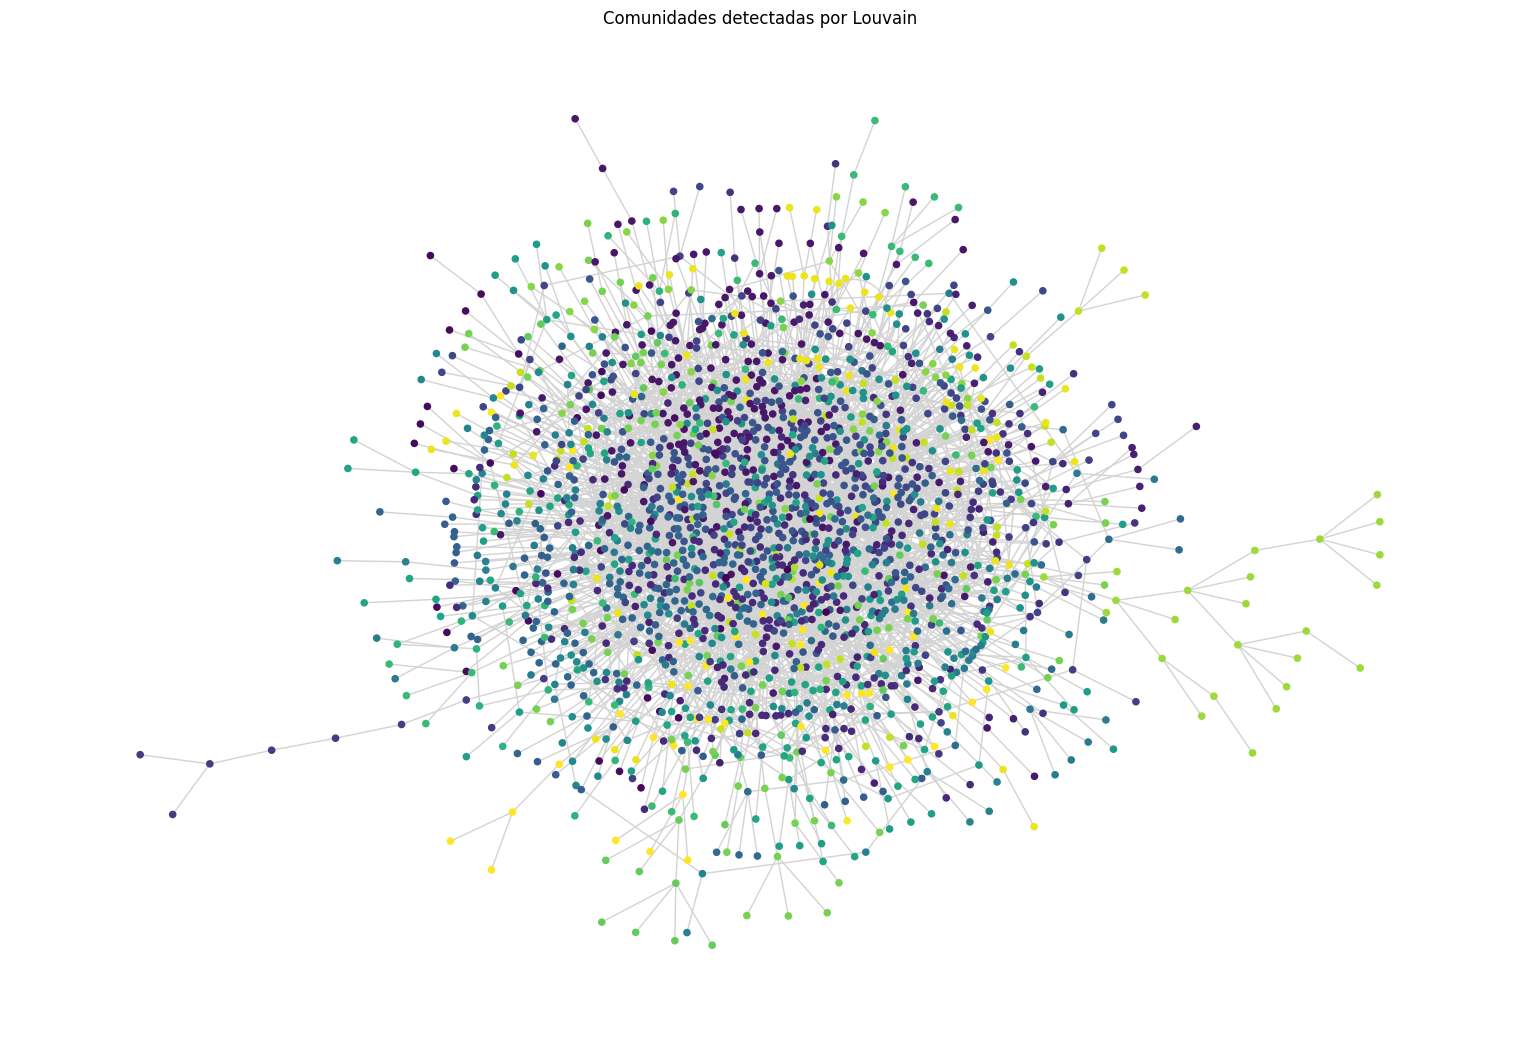

In [11]:
plt.figure(figsize=(15, 10))
pos = nx.kamada_kawai_layout(G=G_undirected)
nx.draw(
    G=G_undirected,
    pos=pos,
    node_size=20,
    node_color=list(partition_louvain.values()),
    edge_color='lightgray'
)
plt.title("Comunidades detectadas por Louvain")
plt.show()

#### 1.2 Label Propagation
Este algoritmo es relevante para detectar comunidades en redes de organizaciones e inversores debido a su simplicidad y eficacia, especialmente en redes con un gran overlap entre nodos. Este método asigna etiquetas a los nodos basándose en las etiquetas más frecuentes entre sus vecinos, lo que facilita la identificación de comunidades basadas en relaciones directas e intereses compartidos. Esto es particularmente útil para una organización que busca financiamiento, ya que puede revelar inversores potenciales que ya están conectados con organizaciones similares, indicando una predisposición a invertir en ciertos tipos de empresas o sectores.

In [12]:
# Algoritmo LPA
lpa = list(nx.algorithms.community.label_propagation_communities(G=G_undirected))
lpa_fix = {nodo: idx for idx, comunidad in enumerate(lpa) for nodo in comunidad}

In [13]:
# Se crea un dataframe con la asignacion de comunidades
comunidades_lpa = pd.DataFrame(
    data=lpa_fix.items(),
    columns=["Nodo", "Comunidad"]
)
comunidades_lpa.head().T

0       1      2                          3         4
Nodo       01 Advisors  Origin  Azimo  American Express Ventures  Gig Wage
Comunidad            0       0      1                          1         1

In [14]:
# Numero de comunidades
print(f"Numero de comunidades detectadas: {comunidades_lpa['Comunidad'].nunique()}")

Numero de comunidades detectadas: 266


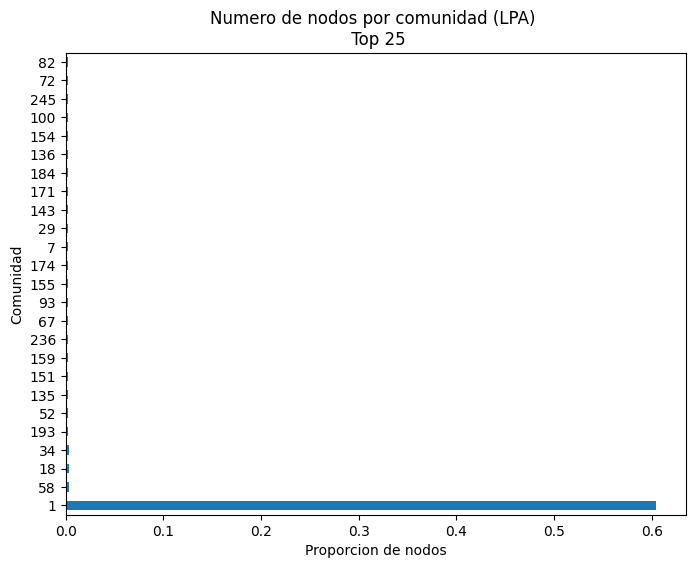

In [15]:
comunidades_lpa['Comunidad'].value_counts(True)\
    .nlargest(25)\
    .plot(kind='barh', figsize=(8, 6), title='Numero de nodos por comunidad (LPA) \n Top 25')
plt.ylabel('Comunidad')
plt.xlabel('Proporcion de nodos')
plt.show()

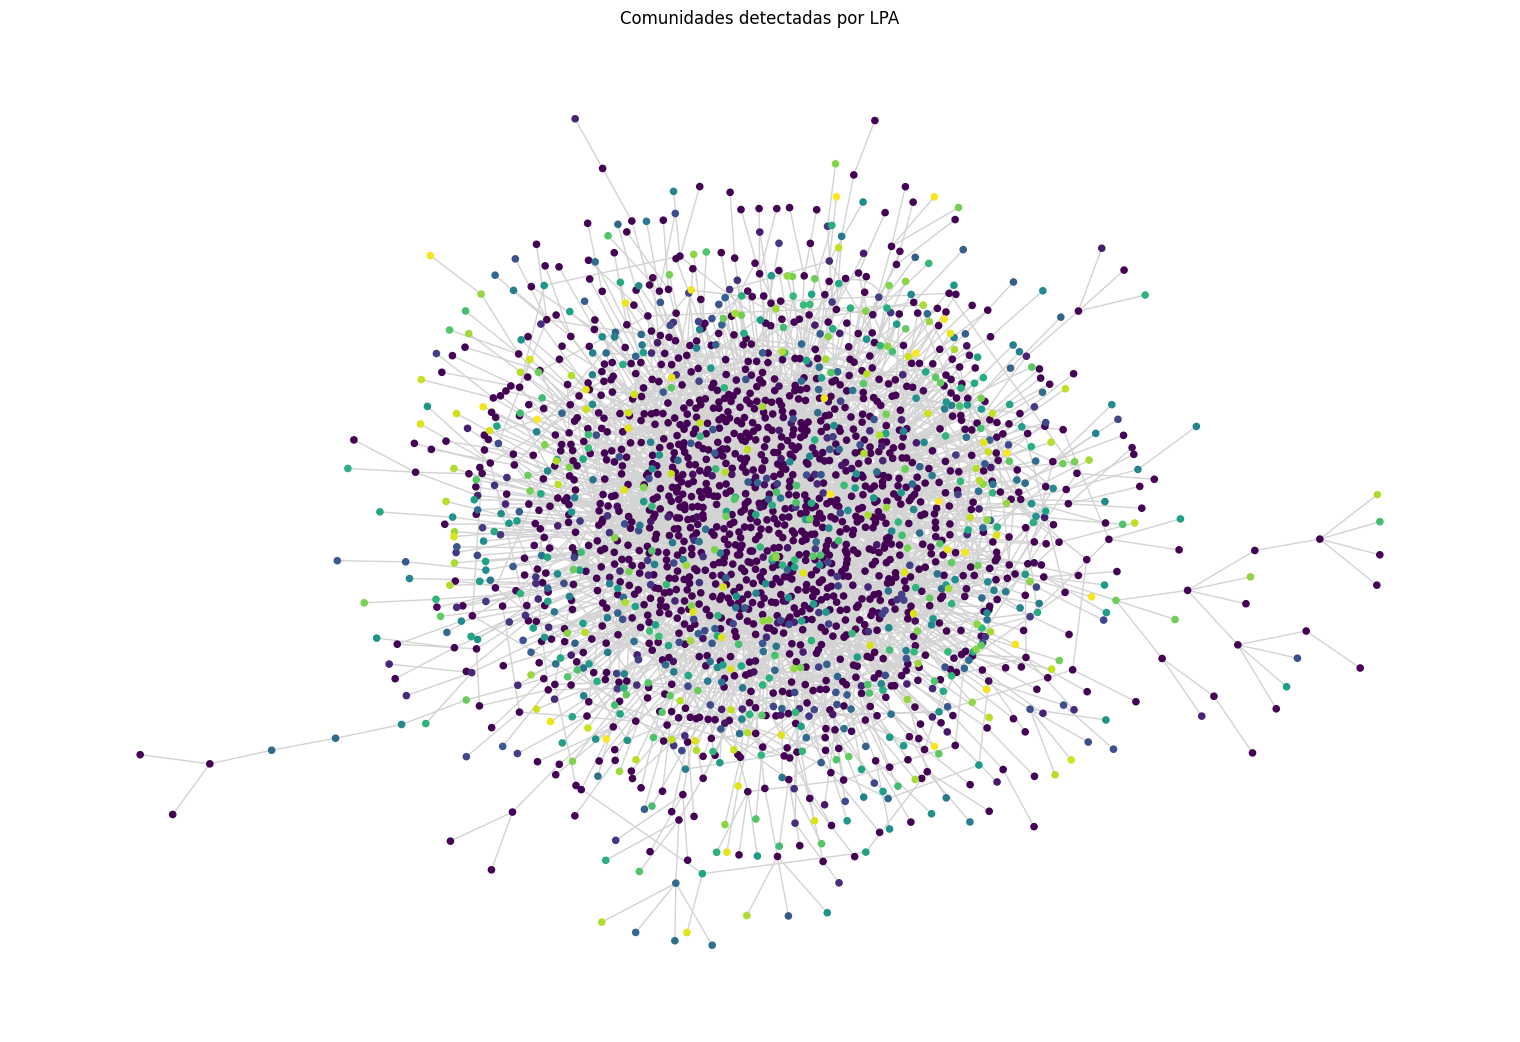

In [16]:
plt.figure(figsize=(15, 10))
pos = nx.kamada_kawai_layout(G=G_undirected)
nx.draw(
    G=G_undirected,
    pos=pos,
    node_size=20,
    node_color=list(lpa_fix.values()),
    edge_color='lightgray'
)
plt.title("Comunidades detectadas por LPA")
plt.show()

#### 1.3 Cliques Percolation
Este algoritmo es significativo en el contexto de análisis de redes de financiamiento debido a su enfoque único en identificar comunidades como uniones de cliques (grupos de nodos que están todos conectados entre sí). Este enfoque es particularmente adecuado para redes con alta superposición de nodos, ya que permite descubrir grupos densamente conectados de organizaciones e inversores. Para una organización en busca de financiamiento, este método puede destacar clusters de inversores con intereses muy específicos y conexiones estrechas, lo que podría indicar una mayor probabilidad de inversión en proyectos que se alineen estrechamente con las preferencias o el enfoque de dichos grupos.

In [17]:
# Cliques Percolation
K=3
cp = list(nx.community.k_clique_communities(G=G_undirected, k=K))
cp_fix = {node: -1 for node in G_undirected.nodes()} # Algunos nodos no estan en ninguna comunidad
cp_fix.update({nodo: idx for idx, comunidad in enumerate(cp) for nodo in comunidad})

In [18]:
# Se crea un dataframe con la asignacion de comunidades
comunidades_cp = pd.DataFrame(
    data=cp_fix.items(),
    columns=["Nodo", "Comunidad"]
)
comunidades_cp.head().T

0         1       2              3          4
Nodo       01 Advisors  Electric  Origin  17Capital LLP  NewSpring
Comunidad           -1        -1      -1             -1         -1

In [19]:
# Numero de comunidades
print(f"Numero de comunidades detectadas: {comunidades_cp['Comunidad'].nunique() - 1}")

Numero de comunidades detectadas: 46


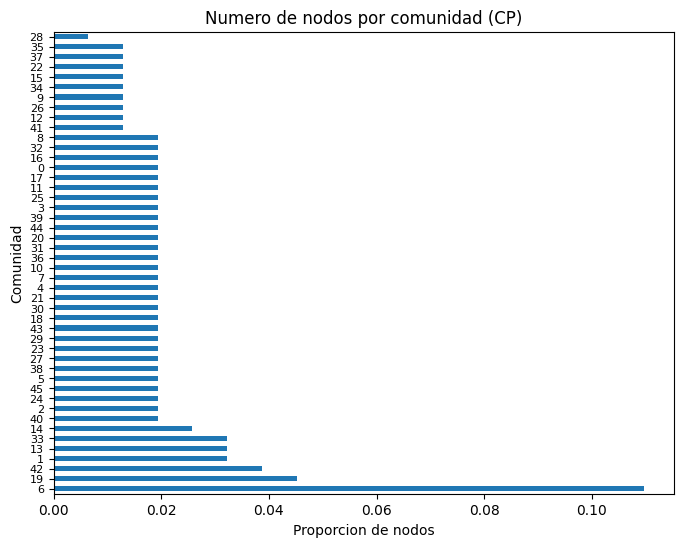

In [20]:
comunidades_cp['Comunidad'][comunidades_cp["Comunidad"] != -1].value_counts(True)\
    .plot(kind='barh', figsize=(8, 6), title='Numero de nodos por comunidad (CP)')
plt.ylabel('Comunidad')
plt.xlabel('Proporcion de nodos')
plt.yticks(size=8)
plt.show()

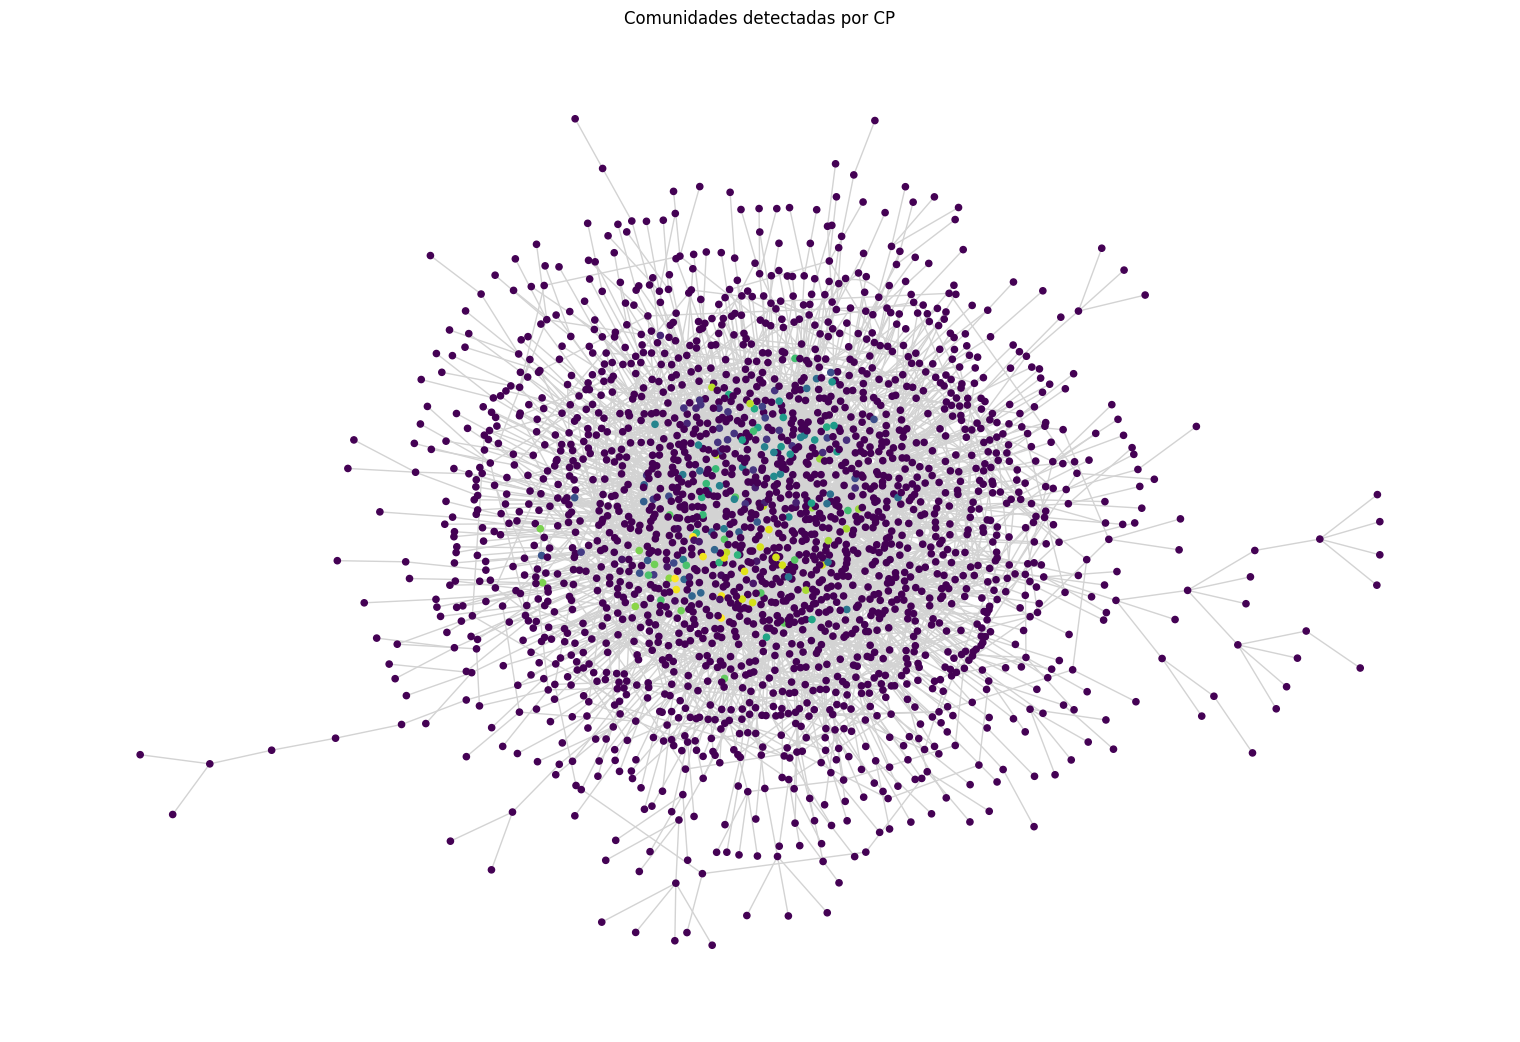

In [21]:
plt.figure(figsize=(15, 10))
pos = nx.kamada_kawai_layout(G=G_undirected)
nx.draw(
    G=G_undirected,
    pos=pos,
    node_size=20,
    node_color=list(cp_fix.values()),
    edge_color='lightgray'
)
plt.title("Comunidades detectadas por CP")
plt.show()

#### 1.4 Girvan-Newman
El algoritmo de Girvan-Newman es relevante en el contexto de detección de comunidades en redes de organizaciones e inversores por su enfoque en la eliminación progresiva de aristas basada en la centralidad de intermediación. Este método descompone la red en comunidades, eliminando las aristas que actúan como puentes entre grupos densamente conectados. Esto es particularmente útil para identificar límites claros entre diferentes comunidades de inversores y organizaciones, permitiendo a las empresas en búsqueda de financiamiento entender cómo se segmentan los grupos de inversores y cuáles están más interconectados. Al identificar estas divisiones, las organizaciones pueden dirigirse estratégicamente a comunidades específicas de inversores que tienen mayor probabilidad de estar interesadas en su tipo de negocio o sector, optimizando así sus esfuerzos de búsqueda de financiamiento.

In [32]:
# Girvan-Newman
communities_generator = nx.algorithms.community.girvan_newman(G=G_undirected)
top_level_communities = next(communities_generator)
top_level_communities = list(top_level_communities)
gn = {nodo: idx for idx, comunidad in enumerate(top_level_communities) for nodo in comunidad}

In [33]:
# Se crea un dataframe con la asignacion de comunidades
comunidades_gn = pd.DataFrame(
    data=gn.items(),
    columns=["Nodo", "Comunidad"]
)
comunidades_gn.head().T

0      1                          2                3  \
Nodo       BACKED VC  Azimo  American Express Ventures  Shasta Ventures   
Comunidad          0      0                          0                0   

                   4  
Nodo       Traveloka  
Comunidad          0

In [35]:
# Numero de comunidades
print(f"Numero de comunidades detectadas: {comunidades_gn['Comunidad'].nunique()}")

Numero de comunidades detectadas: 10


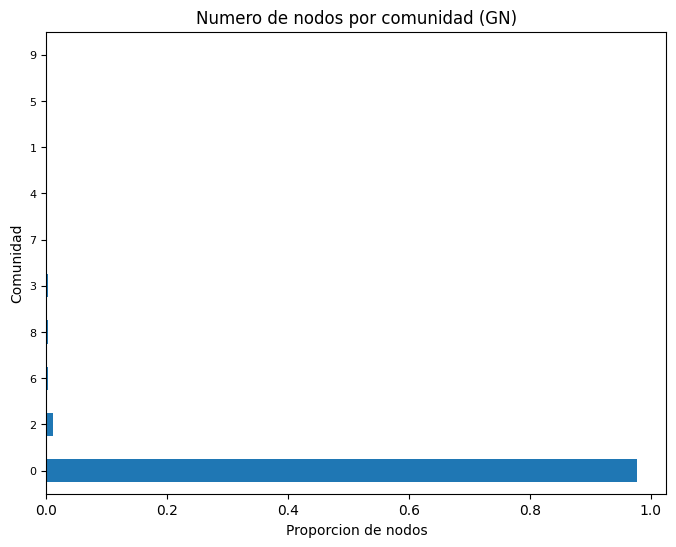

In [36]:
comunidades_gn['Comunidad'].value_counts(True)\
    .plot(kind='barh', figsize=(8, 6), title='Numero de nodos por comunidad (GN)')
plt.ylabel('Comunidad')
plt.xlabel('Proporcion de nodos')
plt.yticks(size=8)
plt.show()

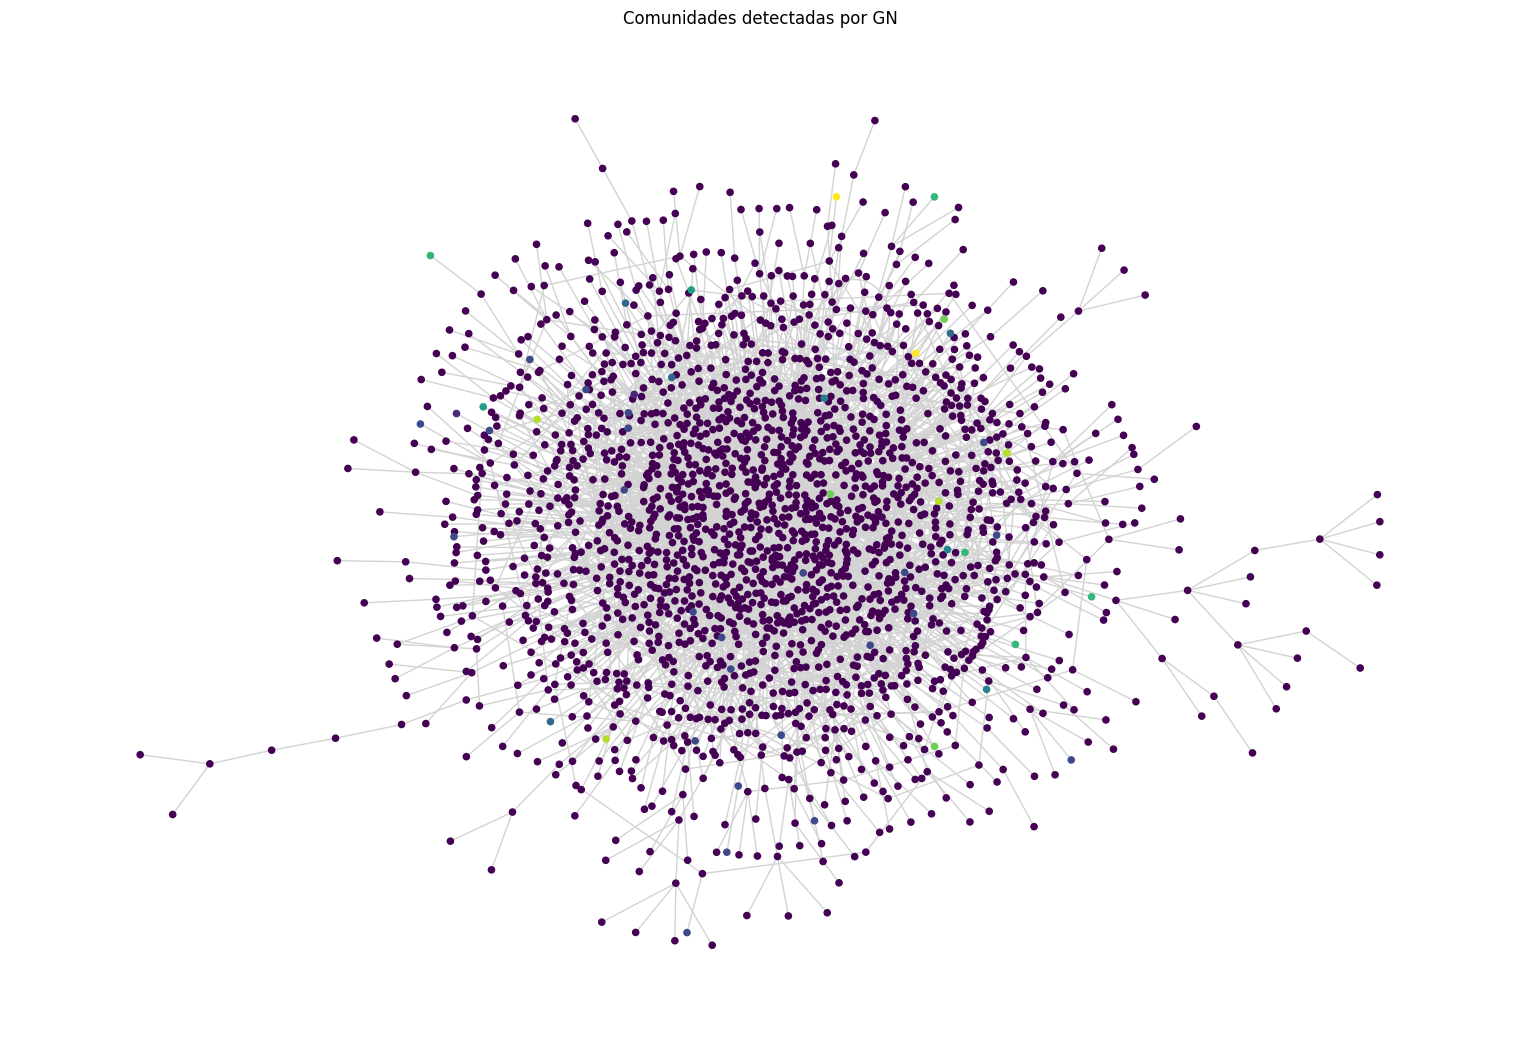

In [37]:
plt.figure(figsize=(15, 10))
pos = nx.kamada_kawai_layout(G=G_undirected)
nx.draw(
    G=G_undirected,
    pos=pos,
    node_size=20,
    node_color=list(gn.values()),
    edge_color='lightgray'
)
plt.title("Comunidades detectadas por GN")
plt.show()

### 2. Analisis de atributos

#### 2.0 Seleccion de variables a analizar

Con el fin de entender las comunidades, primero se realizara una inspeccion general de las variables que se utilizaran para dicho fin. Estas variables son:
- Headquarters Location
- Industries
- Company Type
- Funding Status
- Number of Investments
- Number of Investors
- Total Funding Amount Currency (in USD)
- Number of Funding Rounds

Ademas se dejaran unicamente las empresas que esten activas, es decir `nodos[nodos["Operating Status"] != "Closed"]`.

In [38]:
# Se filtra el dataframe de nodos
nodos_filtered = nodos[nodos["Operating Status"] != "Closed"][[
    'Id',
    'Headquarters Location',
    'Industries',
    'Company Type',
    'Funding Status',
    'Number of Investments',
    'Number of Investors',
    'Total Funding Amount Currency (in USD)', 
    'Number of Funding Rounds',
]].copy()

# Se mapean las comunidades encontradas al dataframe de nodos_filtered
nodos_filtered["Comunidad_Louvain"] = nodos_filtered["Id"].map(partition_louvain)
nodos_filtered["Comunidad_LPA"] = nodos_filtered["Id"].map(lpa_fix)
nodos_filtered["Comunidad_CP"] = nodos_filtered["Id"].map(cp_fix)
nodos_filtered["Comunidad_GN"] = nodos_filtered["Id"].map(gn)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)  



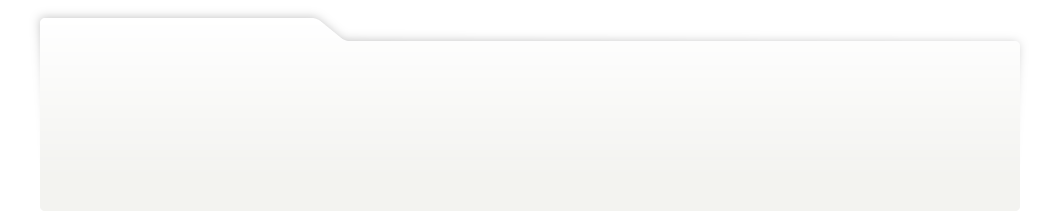
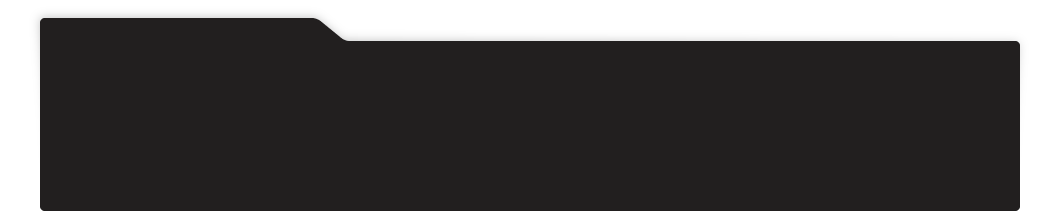
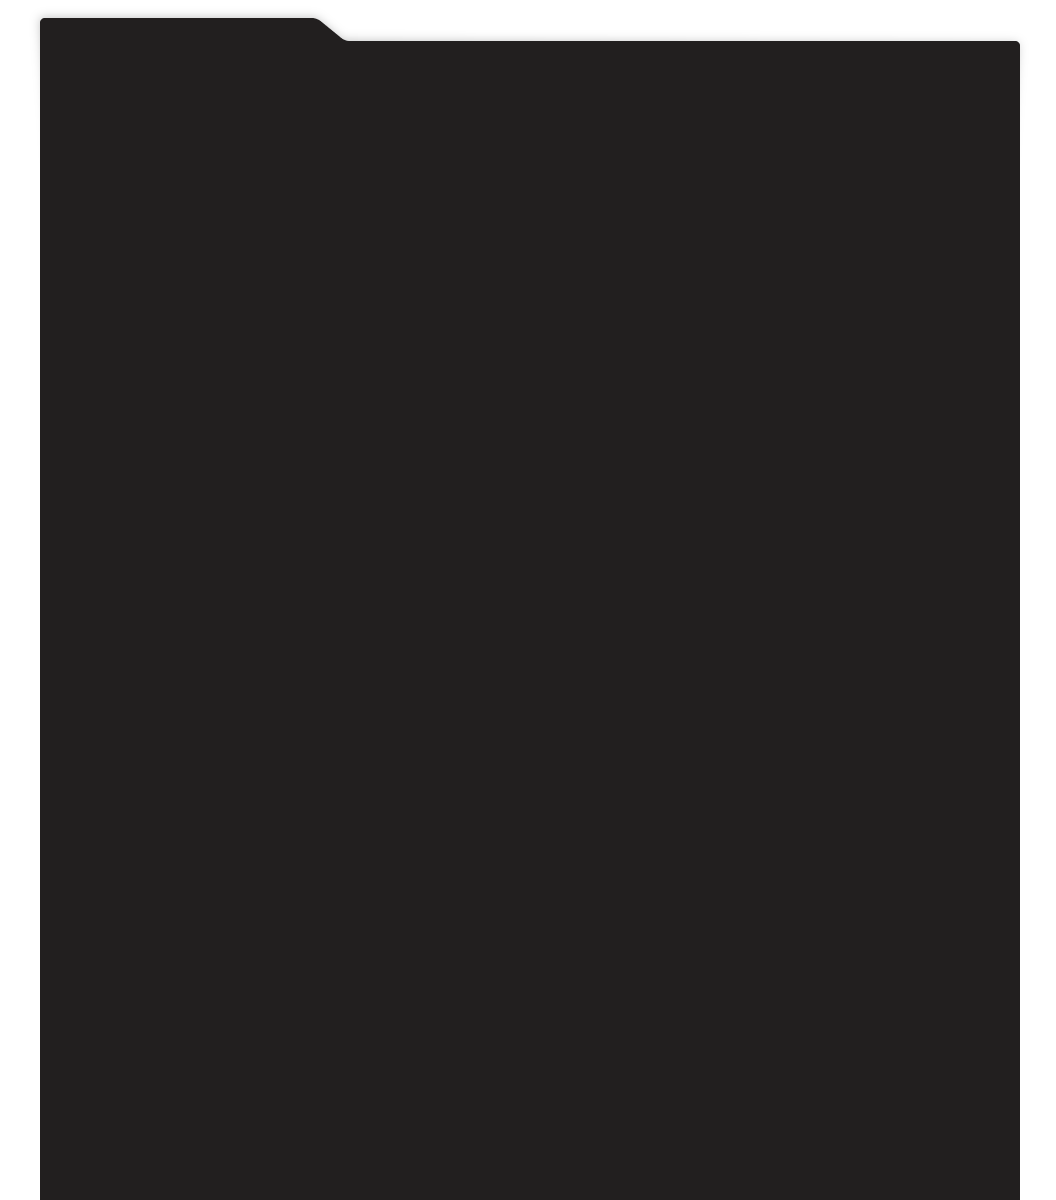
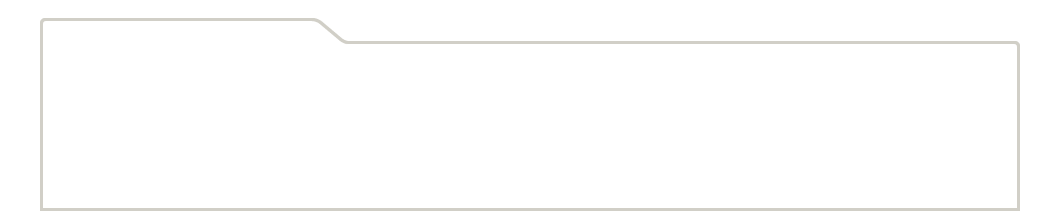
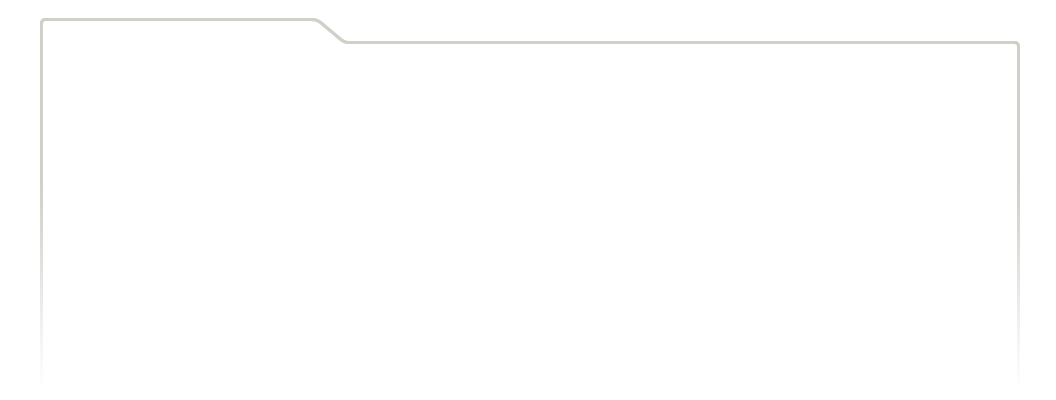
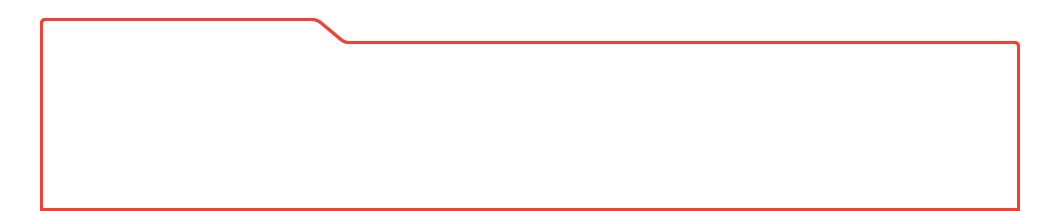
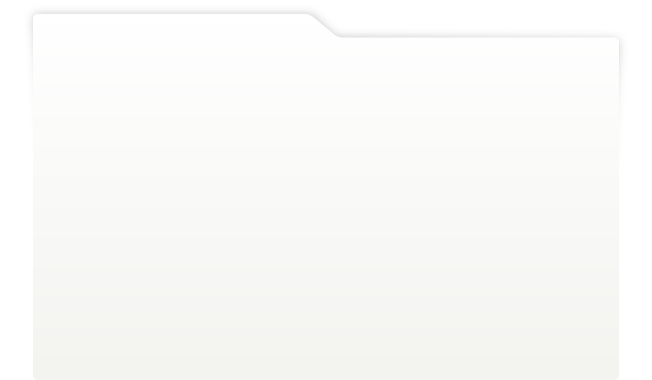
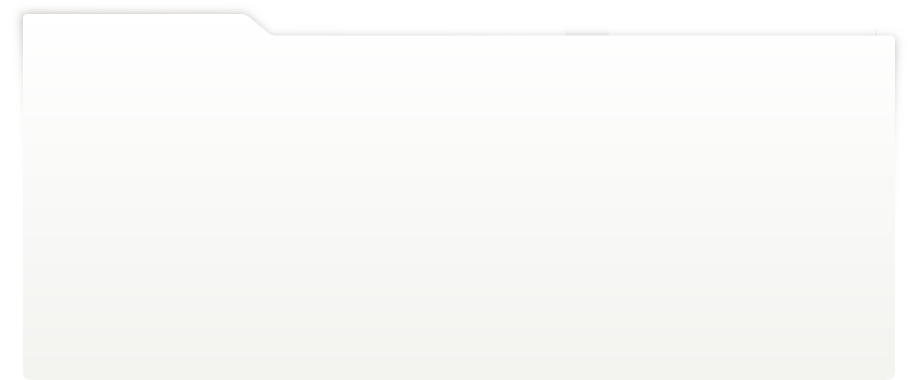
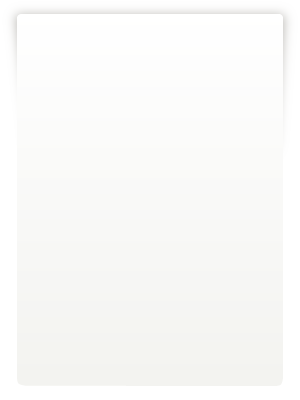
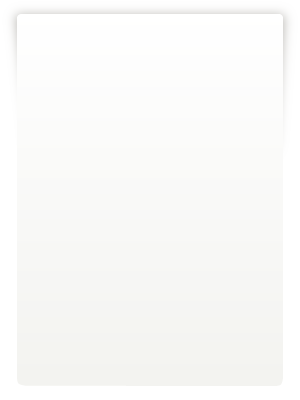
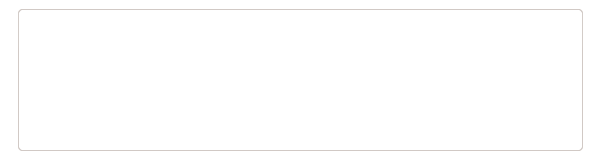
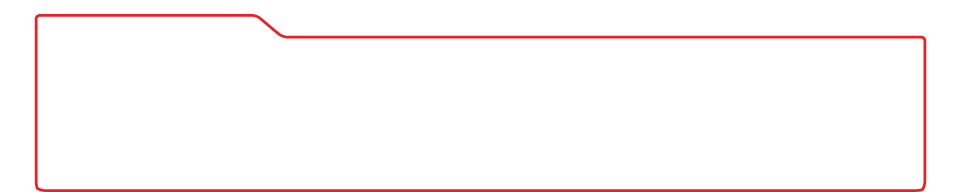
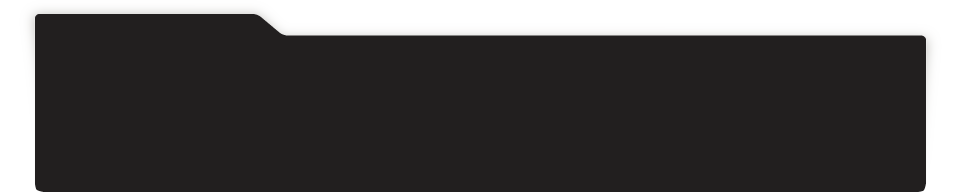
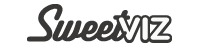
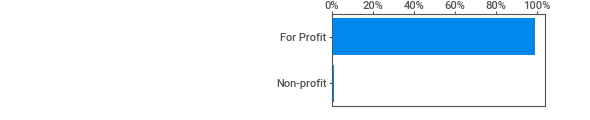
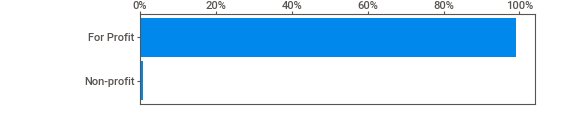
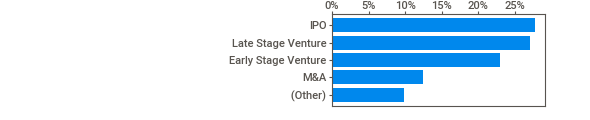
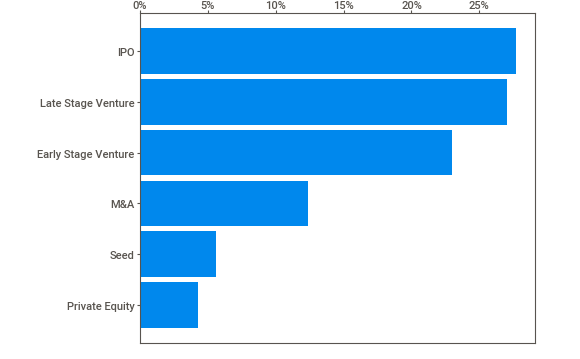
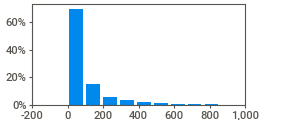
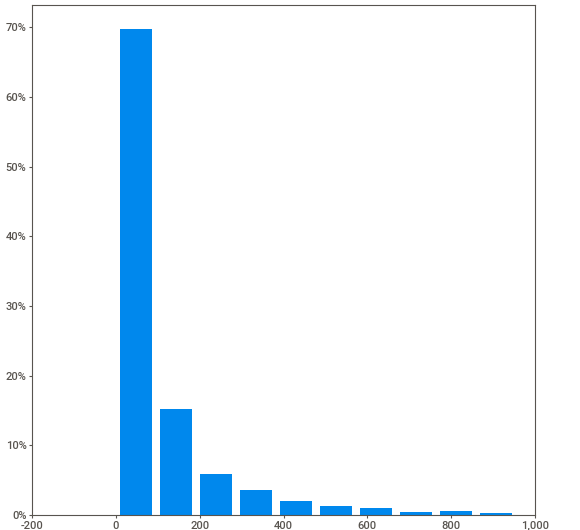
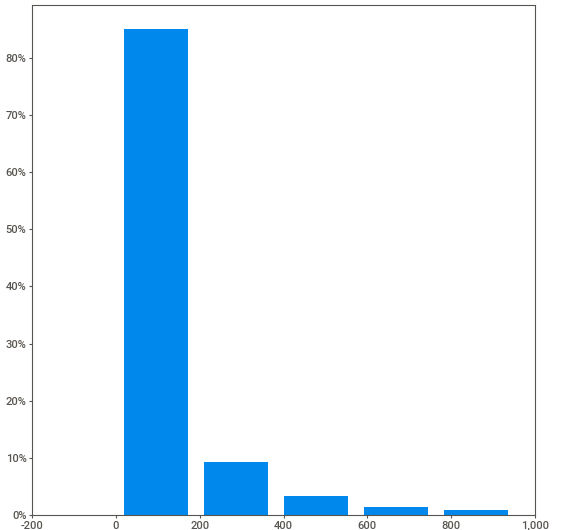
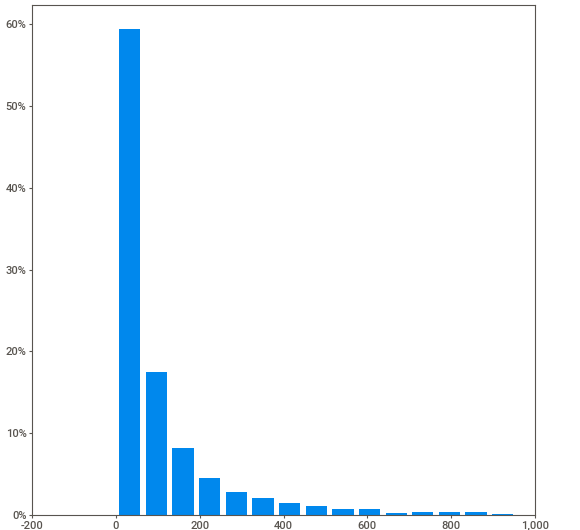
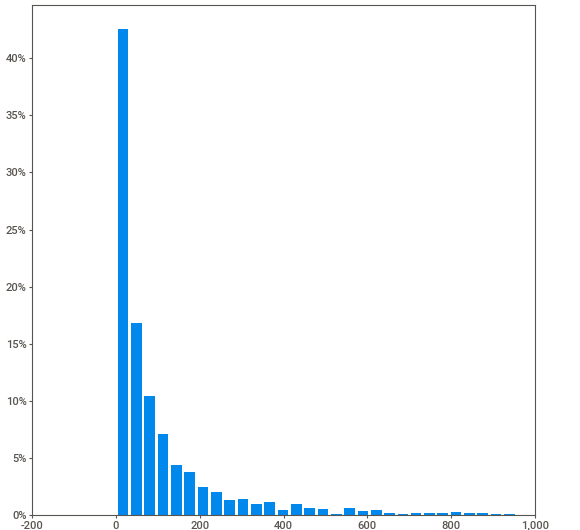
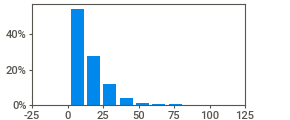
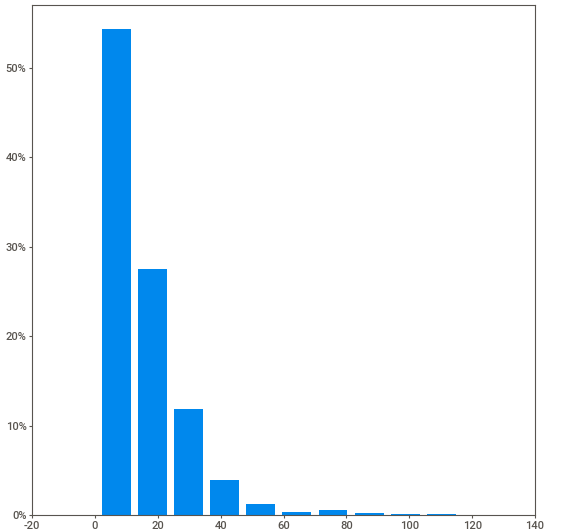
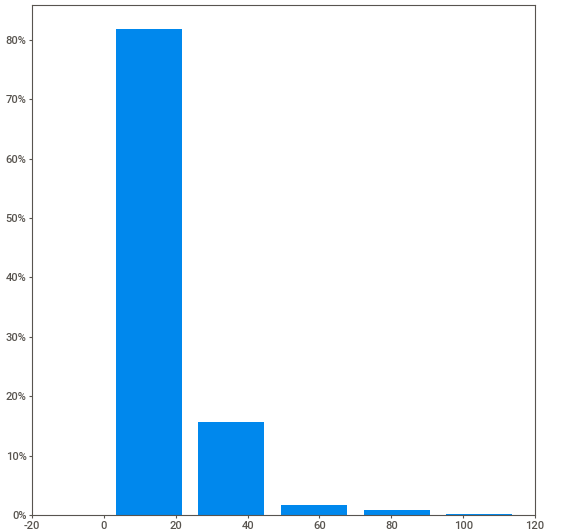
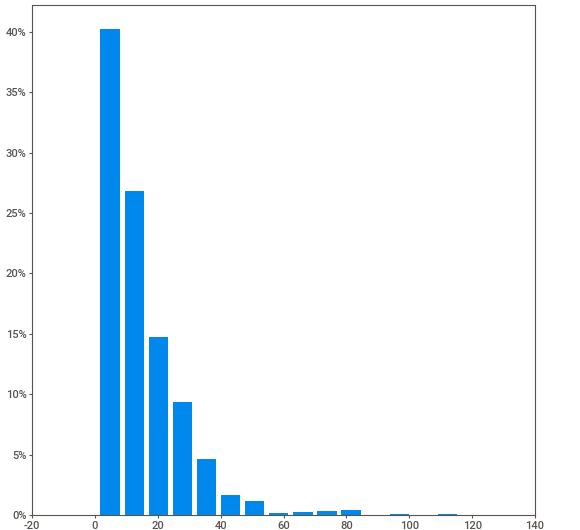
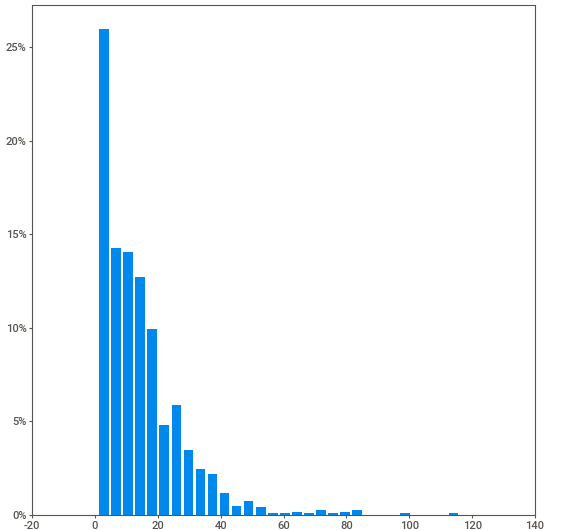
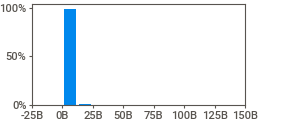
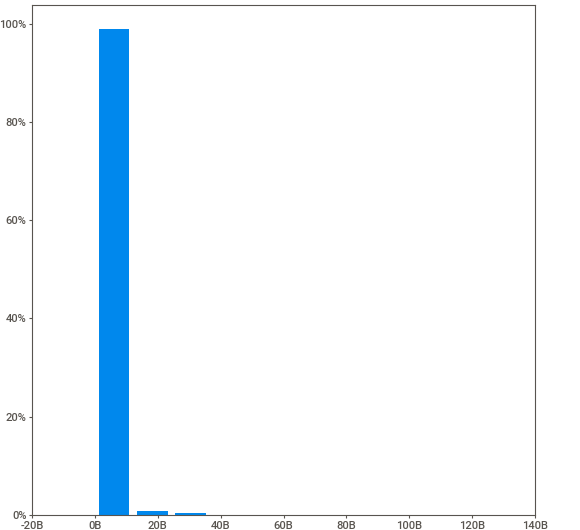
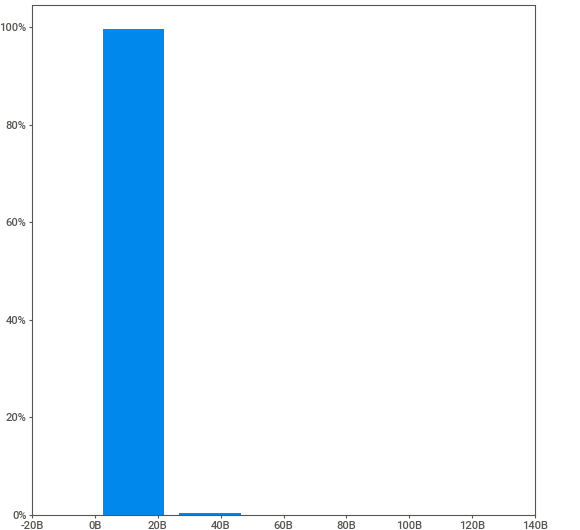
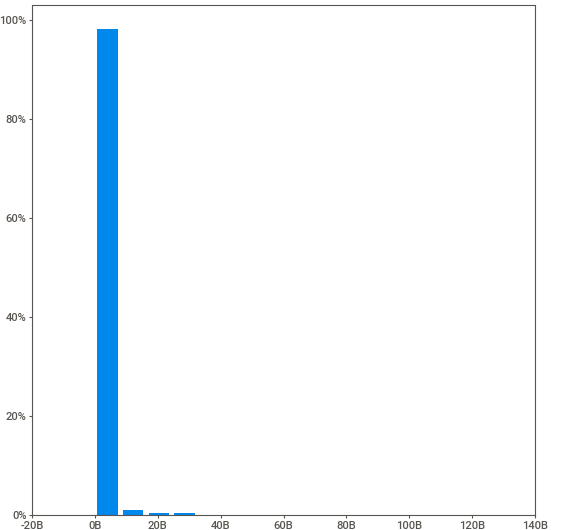
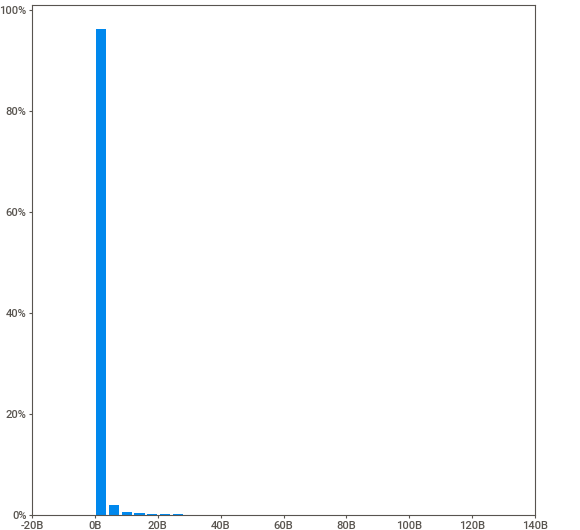
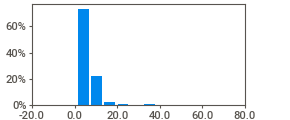
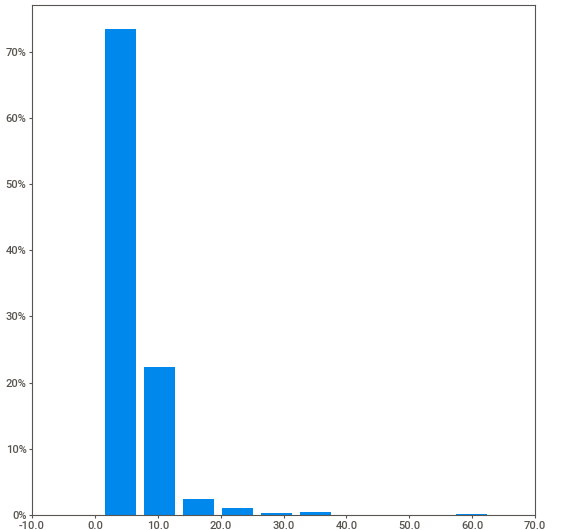
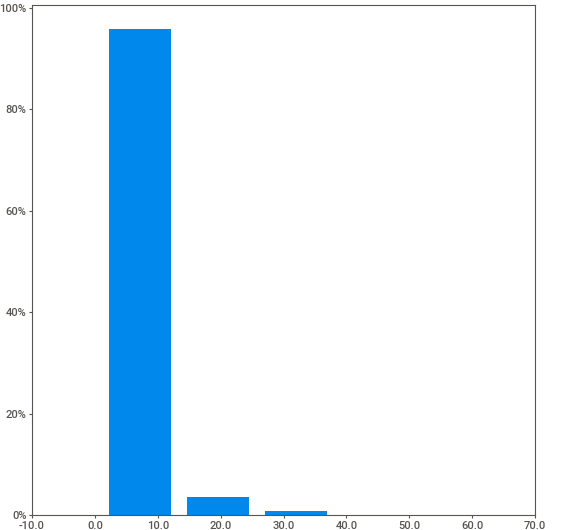
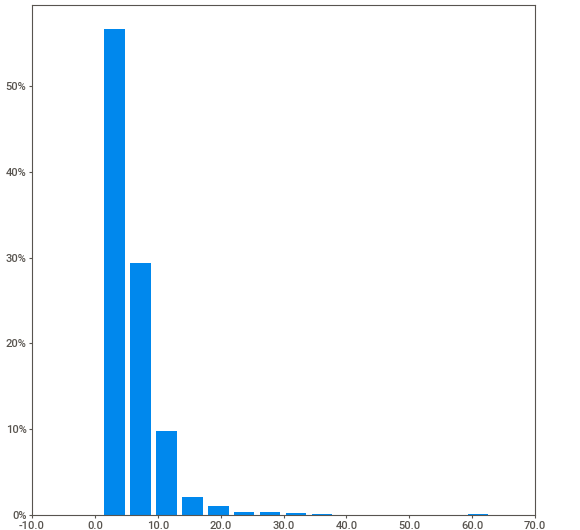
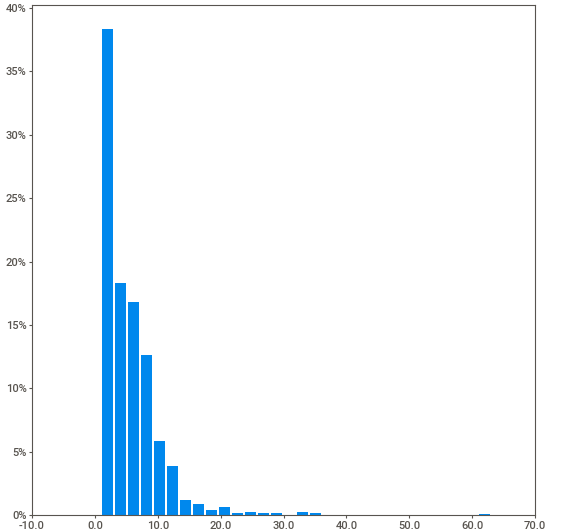
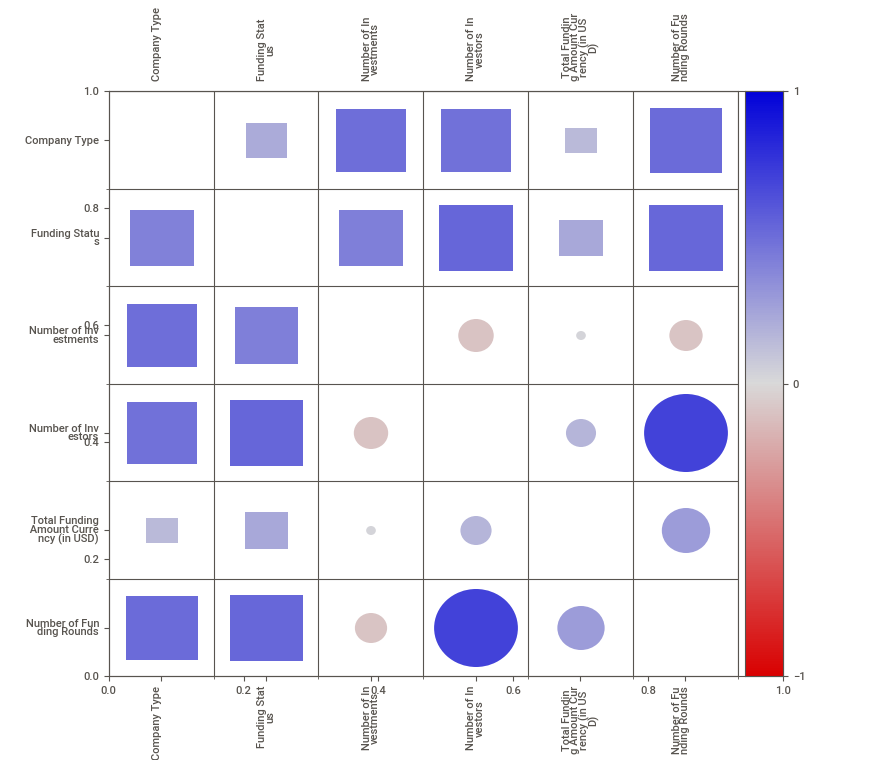
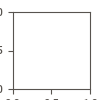

In [39]:
# Se realiza un analisis rapido de las variables seleccionadas
report = sv.analyze(nodos_filtered.drop([c for c in nodos_filtered.columns if c.startswith("Comunidad")], axis=1))
report.show_notebook()
# report.show_html(filepath="reporte.html")

#### 2.1 Comunidades Louvain

In [40]:
louvain_groups = nodos_filtered \
    .groupby(['Comunidad_Louvain']).agg({
        'Id': 'count', 
        'Headquarters Location': lambda x: x.mode(),
        'Industries': lambda x: x.mode(),
        'Company Type': lambda x: x.mode(),
        'Funding Status': lambda x: x.mode(),
        'Number of Investments': 'median',
        'Number of Investors': 'median',
        'Total Funding Amount Currency (in USD)': 'median',
        'Number of Funding Rounds': 'median', 
    }).reset_index() \
    .rename(columns={
        'Id': 'Cantidad de Nodos',
        'Headquarters Location': 'Ubicacion (Moda)',
        'Industries': 'Industrias (Moda)',
        'Company Type': 'Tipo de Compania (Moda)',
        'Funding Status': 'Estado Financiamiento (Moda)',
        'Number of Investments': '#Inversiones (Mediana)',
        'Number of Investors': '#Inversores (Mediana)',
        'Total Funding Amount Currency (in USD)': 'Financiamiento Total (USD) (Mediana)',
        'Number of Funding Rounds': '#Rondas de Financiamiento (Mediana)',
    }).astype({'Comunidad_Louvain': int, "#Inversiones (Mediana)": int, "#Inversores (Mediana)": int, "#Rondas de Financiamiento (Mediana)": int}) \
    .sort_values(by="Cantidad de Nodos", ascending=False)
louvain_groups

Comunidad_Louvain  Cantidad de Nodos  \
2                   2                202   
4                   4                190   
9                   9                188   
7                   7                169   
11                 11                150   
17                 17                110   
20                 20                100   
27                 27                 98   
14                 14                 90   
10                 10                 69   
33                 33                 66   
31                 31                 64   
3                   3                 63   
19                 19                 62   
15                 15                 53   
5                   5                 52   
23                 23                 51   
34                 34                 48   
12                 12                 46   
28                 28                 42   
16                 16                 39   
1                   1                 35   
6                   6                 31   
26                 26                 30   
22                 22                 26   
29                 29                 22   
18                 18                 16   
25                 25                  5   
0                   0                  4   
13                 13                  4   
30                 30                  3   
21                 21                  3   
8                   8                  2   
24                 24                  2   
32                 32                  2   

                                     Ubicacion (Moda)  \
2            San Francisco, California, United States   
4            San Francisco, California, United States   
9            San Francisco, California, United States   
7            San Francisco, California, United States   
11                            Beijing, Beijing, China   
17           San Francisco, California, United States   
20           San Francisco, California, United States   
27                  New York, New York, United States   
14                    London, England, United Kingdom   
10           San Francisco, California, United States   
33                  New York, New York, United States   
31           San Francisco, California, United States   
3                            Toronto, Ontario, Canada   
19           San Francisco, California, United States   
15                    London, England, United Kingdom   
5                          Mumbai, Maharashtra, India   
23                  New York, New York, United States   
34  [London, England, United Kingdom, San Francisc...   
12                    London, England, United Kingdom   
28                  New York, New York, United States   
16                  New York, New York, United States   
1                   New York, New York, United States   
6                   New York, New York, United States   
26                  New York, New York, United States   
22                       Paris, Ile-de-France, France   
29           San Francisco, California, United States   
18  [New York, New York, United States, San Franci...   
25                    Portland, Oregon, United States   
0                  Sydney, New South Wales, Australia   
13  [London, England, United Kingdom, New York, Ne...   
30                            Berlin, Berlin, Germany   
21  [Chapel Hill, North Carolina, United States, S...   
8   [Mumbai, Maharashtra, India, San Francisco, Ca...   
24  [New York, New York, United States, Plano, Tex...   
32  [London, England, United Kingdom, Vilnius, Vil...   

                                    Industrias (Moda) Tipo de Compania (Moda)  \
2        Finance, Financial Services, Venture Capital              For Profit   
4        Finance, Financial Services, Venture Capital              For Profit   
9        Finance, Financial Services, Venture Capital              For Profit   
7        Finance, Financial Services, Vent

Las comunidades de Louvain identificadas en la red revelan patrones significativos respecto a la ubicación, industria, tipo de compañía, estado de financiamiento, inversión y financiamiento total. La mayoría de las organizaciones están concentradas en San Francisco, California, Estados Unidos, lo que sugiere una fuerte presencia de empresas enfocadas en finanzas, servicios financieros y capital de riesgo en esta área geográfica. Además, todas las comunidades se caracterizan por ser compañías con fines de lucro. Los estados de financiamiento varían desde Venture Temprana hasta IPO (Initial Public Offer), con una notable cantidad de empresas en etapas tardías de inversión o que ya han salido a bolsa. Esto indica un ecosistema de organizaciones en diferentes etapas de crecimiento, pero con una inclinación hacia la madurez y estabilidad financiera. Las medianas de inversión y financiamiento total muestran que, mientras algunas comunidades están en etapas iniciales con menor financiamiento y rondas de inversión, otras han acumulado cantidades significativas de capital, lo que refleja una diversidad en la capacidad de atracción de inversión dentro de la red. Este análisis sugiere que para una organización buscando financiamiento, es crucial enfocarse en entidades dentro de las industrias de finanzas y servicios financieros, preferiblemente en San Francisco o áreas con concentraciones similares de organizaciones, y considerar el estado de financiamiento y la etapa de inversión como indicadores claves para la colaboración o el engagement.

#### 2.2 Comunidades LPA

Para las comunidades encontradas con LPA:
- Excluiremos la comunidad 1, ya que contiene alrededor del 60% de los nodos.
- Ademas dado el gran numero de comunidades (266) se analizaran las 5 comunidades con mayor cantidad de nodos y las 5 comunidades con menor cantidad de nodos.

In [41]:
lpa_groups = nodos_filtered \
    .groupby(['Comunidad_LPA']).agg({
        'Id': 'count', 
        'Headquarters Location': lambda x: x.mode(),
        'Industries': lambda x: x.mode(),
        'Company Type': lambda x: x.mode(),
        'Funding Status': lambda x: x.mode(),
        'Number of Investments': 'median',
        'Number of Investors': 'median',
        'Total Funding Amount Currency (in USD)': 'median',
        'Number of Funding Rounds': 'median', 
    }).reset_index() \
    .rename(columns={
        'Id': 'Cantidad de Nodos',
        'Headquarters Location': 'Ubicacion (Moda)',
        'Industries': 'Industrias (Moda)',
        'Company Type': 'Tipo de Compania (Moda)',
        'Funding Status': 'Estado Financiamiento (Moda)',
        'Number of Investments': '#Inversiones (Mediana)',
        'Number of Investors': '#Inversores (Mediana)',
        'Total Funding Amount Currency (in USD)': 'Financiamiento Total (USD) (Mediana)',
        'Number of Funding Rounds': '#Rondas de Financiamiento (Mediana)',
    }).astype({'Comunidad_LPA': int, "#Inversiones (Mediana)": int, "#Inversores (Mediana)": int, "#Rondas de Financiamiento (Mediana)": int}, errors="ignore") \
    .sort_values(by="Cantidad de Nodos", ascending=False)

In [42]:
lpa_groups[lpa_groups["Comunidad_LPA"] != 1].head(5)

Comunidad_LPA  Cantidad de Nodos  \
34              34                  7   
58              58                  7   
52              52                  6   
193            193                  6   
151            151                  6   

                                      Ubicacion (Moda)  \
34   [MontrÃ©al, Quebec, Canada, San Francisco, Cal...   
58                   New York, New York, United States   
52   [Berlin, Berlin, Germany, London, England, Uni...   
193                            Berlin, Berlin, Germany   
151  [Berlin, Berlin, Germany, Stockholm, Stockholm...   

                                     Industrias (Moda)  \
34   [Bitcoin, Blockchain, Cryptocurrency, Financia...   
58   [Angel Investment, Financial Services, Health ...   
52   [Angel Investment, Finance, Financial Services...   
193  [Advertising, Big Data, FinTech, Health Care, ...   
151  [Angel Investment, Financial Services, Venture...   

    Tipo de Compania (Moda) Estado Financiamiento (Moda)  \
34               For Profit   [Early Stage Venture, IPO]   
58               For Profit                   [IPO, M&A]   
52               For Profit          Early Stage Venture   
193              For Profit                          IPO   
151              For Profit          Early Stage Venture   

     #Inversiones (Mediana)  #Inversores (Mediana)  \
34                       26                   11.0   
58                      111                   12.5   
52                      145                    7.0   
193                      28                    8.0   
151                     112                    7.0   

     Financiamiento Total (USD) (Mediana)  #Rondas de Financiamiento (Mediana)  
34                           4.764931e+08                                  6.5  
58                           3.287066e+09                                  7.5  
52                           2.085022e+07                                  1.0  
193                          6.060747e+07                                  2.5  
151                          1.077762e+08                                  3.0

In [43]:
lpa_groups[lpa_groups["Comunidad_LPA"] != 1].tail(5)

Comunidad_LPA  Cantidad de Nodos  \
261            261                  2   
180            180                  2   
181            181                  2   
182            182                  2   
23              23                  1   

                                      Ubicacion (Moda)  \
261  [Tarrytown, New York, United States, Washingto...   
180  [Cologne, Nordrhein-Westfalen, Germany, Paris,...   
181  [London, England, United Kingdom, Poznan, Wiel...   
182  [Luxembourg, Luxembourg, Luxembourg, Paris, Il...   
23               Minneapolis, Minnesota, United States   

                                     Industrias (Moda)  \
261  [Biopharma, Biotechnology, Pharmaceutical, Gov...   
180  [Finance, Financial Services, Venture Capital,...   
181  [Automotive, Retail, Shopping, Banking, Financ...   
182       Banking, Credit, Finance, Financial Services   
23   Biotechnology, Health Care, Health Diagnostics...   

    Tipo de Compania (Moda) Estado Financiamiento (Moda)  \
261              For Profit                          IPO   
180              For Profit                          M&A   
181              For Profit                          M&A   
182              For Profit                          IPO   
23               For Profit                          IPO   

     #Inversiones (Mediana)  #Inversores (Mediana)  \
261                      26                    1.0   
180                     111                    1.0   
181                      47                    1.0   
182                      96                    1.0   
23                       74                    3.0   

     Financiamiento Total (USD) (Mediana)  #Rondas de Financiamiento (Mediana)  
261                             8900000.0                                  1.0  
180                                   NaN                                  1.0  
181                            24935498.0                                  1.0  
182                           774445082.0                                  1.0  
23                            367044995.0                                  5.0

El análisis de las comunidades encontradas mediante el algoritmo LPA revela una diversidad notable tanto en ubicaciones geográficas como en sectores de industria, con un enfoque predominante en compañías con fines de lucro. Las cinco comunidades más grandes destacan por su variedad en ubicaciones, abarcando desde Montréal y San Francisco hasta Berlín y Londres, reflejando una presencia global. Estas comunidades se caracterizan por una concentración en sectores relacionados con FinTech, servicios financieros, salud, y tecnología blockchain, indicando una tendencia hacia industrias innovadoras y de rápido crecimiento. Los estados de financiamiento varían desde empresas en etapas tempranas de inversión hasta aquellas que han alcanzado la IPO o M&A, mostrando un amplio espectro en el desarrollo empresarial. La financiación total y el número de rondas de financiamiento sugieren que algunas de estas comunidades han logrado atraer inversiones significativas, con medias que destacan tanto en el número de inversiones como en el financiamiento total obtenido. Por otro lado, las cinco comunidades más pequeñas también reflejan una diversidad geográfica y sectorial, pero con una inclinación hacia la biotecnología, servicios financieros, y el sector de salud, lo cual podría indicar nichos de interés específico para inversores o colaboradores buscando innovación en estos campos. Este análisis subraya la importancia de considerar tanto la ubicación geográfica como el sector de industria al buscar colaboraciones o financiamiento, y destaca la variabilidad en el desarrollo y necesidades de financiamiento entre diferentes comunidades en la red.

#### 2.3 Comunidades - CP

Para las comunidades encontradas con CP:
- Excluiremos la comunidad -1, ya que representa los nodos que no fueron asignados a una comunidad.

In [44]:
cp_groups = nodos_filtered \
    .groupby(['Comunidad_CP']).agg({
        'Id': 'count', 
        'Headquarters Location': lambda x: x.mode(),
        'Industries': lambda x: x.mode(),
        'Company Type': lambda x: x.mode(),
        'Funding Status': lambda x: x.mode(),
        'Number of Investments': 'median',
        'Number of Investors': 'median',
        'Total Funding Amount Currency (in USD)': 'median',
        'Number of Funding Rounds': 'median', 
    }).reset_index() \
    .rename(columns={
        'Id': 'Cantidad de Nodos',
        'Headquarters Location': 'Ubicacion (Moda)',
        'Industries': 'Industrias (Moda)',
        'Company Type': 'Tipo de Compania (Moda)',
        'Funding Status': 'Estado Financiamiento (Moda)',
        'Number of Investments': '#Inversiones (Mediana)',
        'Number of Investors': '#Inversores (Mediana)',
        'Total Funding Amount Currency (in USD)': 'Financiamiento Total (USD) (Mediana)',
        'Number of Funding Rounds': '#Rondas de Financiamiento (Mediana)',
    }).astype({'Comunidad_CP': int, "#Inversiones (Mediana)": int, "#Inversores (Mediana)": int, "#Rondas de Financiamiento (Mediana)": int}, errors="ignore") \
    .sort_values(by="Cantidad de Nodos", ascending=False)
cp_groups[cp_groups["Comunidad_CP"] != -1]

Comunidad_CP  Cantidad de Nodos  \
7              6                 16   
20            19                  7   
43            42                  6   
34            33                  5   
14            13                  5   
2              1                  5   
15            14                  4   
5              4                  3   
9              8                  3   
8              7                  3   
6              5                  3   
4              3                  3   
3              2                  3   
1              0                  3   
45            44                  3   
44            43                  3   
11            10                  3   
12            11                  3   
21            20                  3   
19            18                  3   
18            17                  3   
17            16                  3   
30            29                  3   
25            24                  3   
28            27                  3   
37            36                  3   
31            30                  3   
32            31                  3   
22            21                  3   
26            25                  3   
39            38                  3   
41            40                  3   
46            45                  3   
40            39                  3   
33            32                  3   
10             9                  2   
13            12                  2   
16            15                  2   
38            37                  2   
27            26                  2   
24            23                  2   
23            22                  2   
35            34                  2   
36            35                  2   
42            41                  2   
29            28                  1   

                                     Ubicacion (Moda)  \
7                   New York, New York, United States   
20           San Francisco, California, United States   
43                            Gurgaon, Haryana, India   
34                        Bengaluru, Karnataka, India   
14           San Francisco, California, United States   
2                             Beijing, Beijing, China   
15  [Gurgaon, Haryana, India, London, England, Uni...   
5   [Montevideo, NA - Uruguay, Uruguay, New York, ...   
9   [Menlo Park, California, United States, Miami,...   
8                             Beijing, Beijing, China   
6   [Palo Alto, California, United States, San Fra...   
4   [London, England, United Kingdom, Oakland, Cal...   
3   [Gurgaon, Haryana, India, Redmond, Washington,...   
1   [Beijing, Beijing, China, Changyang, Beijing, ...   
45  [Andheri, Maharashtra, India, Bengaluru, Karna...   
44  [Hangzhou, Zhejiang, China, Jacksonville, Flor...   
11  [Mountain View, California, United States, Pal...   
12  [Bethesda, Maryland, United States, Rochester,...   
21  [New York, New York, United States, San Franci...   
19                  New York, New York, United States   
18  [London, England, United Kingdom, New York, Ne...   
17  [Chicago, Illinois, United States, Mountain Vi...   
30  [Buenos Aires, Distrito Federal, Argentina, Ne...   
25  [Austin, Texas, United States, Greenwich, Conn...   
28                  New York, New York, United States   
37                 Dubai, Dubai, United Arab Emirates   
31  [Dulles, Virginia, United States, Mountain Vie...   
32                    Basel, Basel-Stadt, Switzerland   
22                  New York, New York, United States   
26  [Menlo Park, California, United States, San Fr...   
39           San Francisco, California, United States   
41           San Francisco, California, United States   
46                            Berlin, Berlin, Germany   
40  [New York, New York, United States, Ottawa, On...   
33  [Beijing, Beijing, China, San Francisco, Calif...   
10  [San Francisco, California, United States, Tok...   
13  [New Delhi, Delhi, India, Noida, Uttar Pradesh...   
16  

Las comunidades encontradas mediante el método de Cliques Percolation en la red social presentan una amplia diversidad en términos de ubicación, industria, tipo de compañía y estado de financiamiento. La comunidad más grande está marcada por una presencia significativa tanto en Nueva York como en San Francisco, Estados Unidos, indicando una fuerte concentración de organizaciones en estas áreas geográficas. Estas comunidades están mayoritariamente compuestas por empresas con fines de lucro, enfocadas en una variedad de industrias que van desde blockchain y criptomonedas hasta servicios financieros y tecnología de la información, con una notable presencia de startups en el sector de videojuegos y aplicaciones móviles. El estado de financiamiento varía ampliamente, incluyendo desde empresas en etapa temprana hasta aquellas que han alcanzado la IPO, lo que refleja la diversidad en la madurez de las organizaciones dentro de estas comunidades. La financiación total y el número de rondas de financiamiento muestran una variación considerable, lo que sugiere que dentro de estas comunidades existen tanto startups en fases iniciales de desarrollo como empresas establecidas con historiales significativos de financiación. Este análisis destaca la importancia de considerar la ubicación geográfica y el sector de industria al buscar colaboraciones o financiamiento dentro de la red, ya que estas características pueden influir en la compatibilidad y los objetivos compartidos entre organizaciones.b

#### 2.4 Comunidades - GN

In [46]:
gn_groups = nodos_filtered \
    .groupby(['Comunidad_GN']).agg({
        'Id': 'count', 
        'Headquarters Location': lambda x: x.mode(),
        'Industries': lambda x: x.mode(),
        'Company Type': lambda x: x.mode(),
        'Funding Status': lambda x: x.mode(),
        'Number of Investments': 'median',
        'Number of Investors': 'median',
        'Total Funding Amount Currency (in USD)': 'median',
        'Number of Funding Rounds': 'median', 
    }).reset_index() \
    .rename(columns={
        'Id': 'Cantidad de Nodos',
        'Headquarters Location': 'Ubicacion (Moda)',
        'Industries': 'Industrias (Moda)',
        'Company Type': 'Tipo de Compania (Moda)',
        'Funding Status': 'Estado Financiamiento (Moda)',
        'Number of Investments': '#Inversiones (Mediana)',
        'Number of Investors': '#Inversores (Mediana)',
        'Total Funding Amount Currency (in USD)': 'Financiamiento Total (USD) (Mediana)',
        'Number of Funding Rounds': '#Rondas de Financiamiento (Mediana)',
    }).astype({'Comunidad_GN': int, "#Inversiones (Mediana)": int, "#Inversores (Mediana)": int, "#Rondas de Financiamiento (Mediana)": int}, errors="ignore") \
    .sort_values(by="Cantidad de Nodos", ascending=False)
gn_groups

Comunidad_GN  Cantidad de Nodos  \
0             0               2090   
2             2                 22   
6             6                  5   
8             8                  4   
3             3                  4   
7             7                  3   
4             4                  3   
1             1                  2   
5             5                  2   
9             9                  2   

                                    Ubicacion (Moda)  \
0           San Francisco, California, United States   
2           San Francisco, California, United States   
6                    Portland, Oregon, United States   
8                 Sydney, New South Wales, Australia   
3  [London, England, United Kingdom, New York, Ne...   
7                            Berlin, Berlin, Germany   
4  [Chapel Hill, North Carolina, United States, S...   
1  [Mumbai, Maharashtra, India, San Francisco, Ca...   
5  [New York, New York, United States, Plano, Tex...   
9  [London, England, United Kingdom, Vilnius, Vil...   

                                   Industrias (Moda) Tipo de Compania (Moda)  \
0       Finance, Financial Services, Venture Capital              For Profit   
2       Finance, Financial Services, Venture Capital              For Profit   
6       Finance, Financial Services, Venture Capital              For Profit   
8  [Analytics, Big Data, Cloud Data Services, Dev...              For Profit   
3  [Artificial Intelligence, CleanTech, GreenTech...              For Profit   
7  [Finance, Financial Services, FinTech, Venture...              For Profit   
4  [Asset Management, Financial Services, Venture...              For Profit   
1  [Beauty, Consumer Goods, Wellness, Venture Cap...              For Profit   
5  [Cyber Security, Information Services, Informa...              For Profit   
9  [Cyber Security, Network Security, Privacy, Fi...              For Profit   

  Estado Financiamiento (Moda)  #Inversiones (Mediana)  #Inversores (Mediana)  \
0                          IPO                      46                     12   
2                          M&A                      30                      3   
6        [M&A, Private Equity]                      56                      3   
8                          M&A                      40                      7   
3          Early Stage Venture                      41                      6   
7                         Seed                     125                      6   
4                         Seed                      18                      4   
1           Late Stage Venture                     102                     10   
5               Private Equity                      60                      2   
9                           []                      39                      6   

   Financiamiento Total (USD) (Mediana)  #Rondas de Financiamiento (Mediana)  
0                           169913709.5                                    5  
2                           283427413.0                                    3  
6                             7004625.0                                    3  
8                            22164432.0                                    4  
3                            16645316.0                                    2  
7                           128024063.0                                    3  
4                             7959342.0                                    2  
1                            37499574.0                                    5  
5                           255000000.0                                    2  
9                           100000000.0                                    1

Los resultados del algoritmo de Girvan-Newman revelan varias comunidades dentro de la red, siendo la más grande y destacada aquella con 2090 nodos, ubicada predominantemente en San Francisco, California, Estados Unidos. Esta comunidad se centra en las industrias de Finanzas, Servicios Financieros y Capital de Riesgo, caracterizándose por ser empresas con fines de lucro que han alcanzado la etapa de Oferta Pública Inicial (IPO) en su financiamiento. Además, muestra una mediana de 46 inversiones y 12 inversores por organización, con una financiación total mediana de aproximadamente 169,913,709.50 USD y una mediana de 5 rondas de financiamiento. Por otro lado, las comunidades más pequeñas presentan una diversidad tanto en ubicaciones como en industrias, incluyendo desde Inteligencia Artificial, Blockchain, hasta Ciberseguridad, reflejando una rica heterogeneidad en la red

### 3. Conclusiones

- El algoritmo de Girvan-Newman ha identificado un número pequeño y manejable de comunidades, lo que facilita el análisis detallado. La comunidad más grande se enfoca en las industrias de Finanzas, Servicios Financieros y Capital de Riesgo en San Francisco, lo cual indica una concentración de organizaciones maduras y financieramente estables. La presencia de una mediana alta de inversiones y financiamiento total sugiere que estas organizaciones tienen un historial probado de atracción de inversión.

- El método de Louvain ha revelado patrones significativos en ubicación e industria, especialmente en finanzas y servicios financieros en San Francisco. Esto demuestra una fuerte inclinación hacia empresas en etapas más maduras de financiamiento. La diversidad en el estado de financiamiento y la inversión total indica un ecosistema variado, donde las organizaciones pueden encontrar potenciales colaboradores o inversores en diferentes etapas de crecimiento.

- A través del método de Clique Percolation, se ha encontrado una diversidad amplia en términos de ubicación e industria, con una notable presencia en tecnología y servicios financieros. La variabilidad en el financiamiento y las etapas de desarrollo sugiere la presencia de oportunidades tanto para startups en etapas iniciales como para empresas establecidas buscando expandirse o innovar.

- El algoritmo LPA ha detectado una gran cantidad de comunidades, reflejando una diversidad significativa en ubicaciones y sectores de industria. Las comunidades más grandes se caracterizan por su enfoque en industrias innovadoras como FinTech y blockchain, mientras que las más pequeñas indican nichos específicos de interés. La variedad en el desarrollo empresarial y necesidades de financiamiento subraya la importancia de una estrategia de búsqueda de financiamiento o colaboración adaptada.

### 4. Recomendacion

Dado el rol de una organización que busca financiamiento y desea entender las comunidades de organizaciones en la red y sus atributos comunes, se recomienda utilizar el algoritmo Girvan-Newman como punto de partida. Este algoritmo permite una visión clara y manejable de las comunidades con diferencias notables, facilitando la identificación de aquellas que son más relevantes para los objetivos específicos de financiamiento y colaboración. La concentración en industrias de Finanzas, Servicios Financieros y Capital de Riesgo, especialmente en ubicaciones como San Francisco, sugiere que las organizaciones dentro de estas comunidades podrían ser los colaboradores o inversores más valiosos para buscar. Además, enfocarse en comunidades con un historial comprobado de atracción de inversión y en etapas más avanzadas de financiamiento podría incrementar las posibilidades de éxito en la obtención de fondos. Por lo tanto, se aconseja priorizar el establecimiento de conexiones dentro de estas comunidades, utilizando los insights específicos del algoritmo Girvan-Newman para guiar las estrategias de networking y presentación de propuestas de financiamiento.